In [ ]:
from google.colab import drive
drive.mount('/content/drive/',force_remount=True)

Mounted at /content/drive/


17227776/17225924 [==============================] - 0s 0us/step
Total number of classes are 40
Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
conv1 (Conv2D)               (None, 112, 112, 32)      864       
_________________________________________________________________
conv1_bn (BatchNormalization (None, 112, 112, 32)      128       
_________________________________________________________________
conv1_relu (ReLU)            (None, 112, 112, 32)      0         
_________________________________________________________________
conv_dw_1 (DepthwiseConv2D)  (None, 112, 112, 32)      288       
_________________________________________________________________
conv_dw_1_bn (BatchNormaliza (None, 112, 112, 32)      128       
_______________________________

/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/training.py:1844: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/10
115/115 [==============================] - 999s 9s/step - loss: 6.4913 - accuracy: 0.5977 - val_loss: 2.4033 - val_accuracy: 0.8309
Epoch 2/10
115/115 [==============================] - 196s 2s/step - loss: 0.7179 - accuracy: 0.9267 - val_loss: 2.1973 - val_accuracy: 0.8873
Epoch 3/10
115/115 [==============================] - 195s 2s/step - loss: 0.5304 - accuracy: 0.9457 - val_loss: 1.9458 - val_accuracy: 0.8897
Epoch 4/10
115/115 [==============================] - 196s 2s/step - loss: 0.3488 - accuracy: 0.9607 - val_loss: 2.2406 - val_accuracy: 0.8995
Epoch 5/10
115/115 [==============================] - 195s 2s/step - loss: 0.4258 - accuracy: 0.9652 - val_loss: 2.7449 - val_accuracy: 0.8848
Epoch 6/10
115/115 [==============================] - 195s 2s/step - loss: 0.2790 - accuracy: 0.9764 - val_loss: 2.1470 - val_accuracy: 0.9020
Epoch 7/10
115/115 [==============================] - 195s 2s/step - loss: 0.2598 - accuracy: 0.9751 - val_loss: 2.9270 - val_accuracy: 0.8995

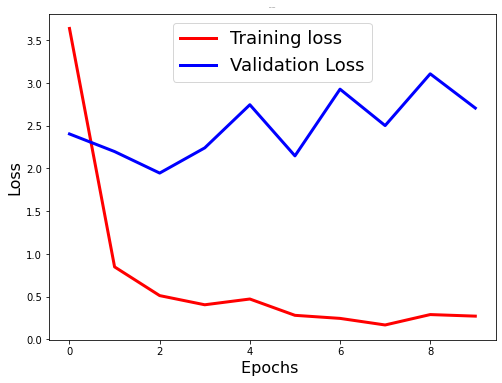

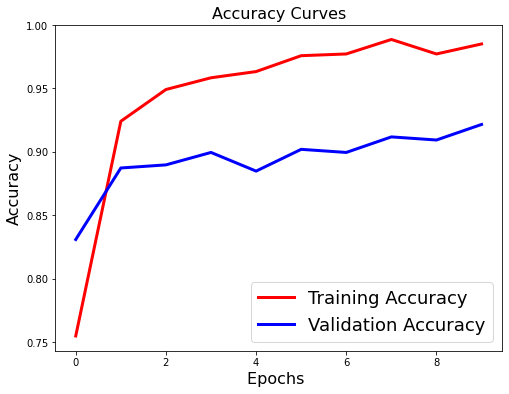

In [ ]:
from keras.layers import Input, Lambda, Dense, Flatten
from keras.models import Model
from keras.applications.mobilenet import MobileNet
from keras.applications.mobilenet import preprocess_input
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
import numpy as np
from glob import glob
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.callbacks import ModelCheckpoint
from keras.models import load_model

IMAGE_SIZE = [224, 224]
train_path = '/content/drive/MyDrive/TrainData'
valid_path = '/content/drive/MyDrive/Test another'

mobilenet = MobileNet(input_shape=IMAGE_SIZE + [3] , weights='imagenet', include_top=False)

for layer in mobilenet.layers:
  layer.trainable = False
  
folders = glob('/content/drive/MyDrive/TrainData/*')
print("Total number of classes are",len(folders))  

# our layers can add more if you want
x = Flatten()(mobilenet.output)

prediction = Dense(len(folders), activation='softmax')(x)

model = Model(inputs=mobilenet.input, outputs=prediction)

model.summary()

model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])


from keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)

training_set = train_datagen.flow_from_directory(train_path,
                                                 target_size = (224, 224),
                                                 batch_size = 32,
                                                 class_mode = 'categorical')
test_set = test_datagen.flow_from_directory(valid_path,
                                            target_size = (224, 224),
                                            batch_size = 32,
                                            class_mode = 'categorical')

#flow from directory is the method of imagedatagenerator
# earlystopping_callback = EarlyStopping(monitor='val_accuracy',mode='auto')
checkpoint_callback = ModelCheckpoint(filepath='CNN MobileNetV1.h5',monitor='val_accuracy', mode='max', save_best_only=True)
history=model.fit_generator(training_set,validation_data=(test_set),epochs=10,steps_per_epoch=len(training_set)
,validation_steps=len(test_set),callbacks=[checkpoint_callback])

model = load_model('CNN MobileNetV1.h5')
[train_loss, train_accuracy] = model.evaluate(training_set)
print("Evaluation result on Train Data : Loss = {}, accuracy = {}".format(train_loss, train_accuracy))
[test_loss, test_acc] = model.evaluate(test_set)
print("Evaluation result on Test Data : Loss = {}, accuracy = {}".format(test_loss, test_acc))

#Plot the loss curves
plt.figure(figsize=[8,6])
plt.plot(history.history['loss'],'r',linewidth=3.0)
plt.plot(history.history['val_loss'],'b',linewidth=3.0)
plt.legend(['Training loss', 'Validation Loss'],fontsize=18)
plt.xlabel('Epochs ',fontsize=16)
plt.ylabel('Loss',fontsize=16)
plt.title('Loss Curves',fontsize=1)
plt.show()

#Plot the Accuracy Curves
plt.figure(figsize=[8,6]) 
plt.plot(history.history['accuracy'],'r',linewidth=3.0) 
plt.plot(history.history['val_accuracy'],'b',linewidth=3.0)
plt.legend(['Training Accuracy', 'Validation Accuracy'],fontsize=18)
plt.xlabel('Epochs ',fontsize=16) 
plt.ylabel('Accuracy',fontsize=16)
plt.title('Accuracy Curves',fontsize=16)
plt.show()


In [ ]:
import cv2
import tensorflow as tf


def prepare(filepath):
    img = image.load_img(filepath , target_size=(224, 224))
    img_array = image.img_to_array(img)
    img_array_expanded_dims = np.expand_dims(img_array, axis=0)
    return tf.keras.applications.inception_resnet_v2.preprocess_input(img_array_expanded_dims)


model = tf.keras.models.load_model("CNN MobileNetV1.h5")

prediction = model.predict([prepare('/content/drive/MyDrive/test imgs/pizzahut1.jpg')])
print(prediction)  # will be a list in a list.
highest=np.argmax(prediction)
print("Highest position : ", highest)
if(highest==0):
    print("This class is Acer")
elif(highest==1):
    print("This class is Albertsons")
elif(highest==2):
    print("This class is Apple")
elif(highest==3):
    print("This class is Asus")
elif(highest==4):
    print("This class is Audi")
elif(highest==5):
    print("This class is BMW")
elif(highest==6):
    print("This class is Becel")
elif(highest==7):
    print("This class is Burger King")
elif(highest==8):
    print("This class is Cadbury")
elif(highest==9):
    print("This class is Calpol")
elif(highest==10):
    print("This class is Colgate")
elif(highest==11):
    print("This class is Friskies")
elif(highest==12):
    print("This class is Intel")
elif(highest==13):
    print("This class is Jaguar")
elif(highest==14):
    print("This class is KFC")
elif(highest==15):
    print("This class is KitKat")
elif(highest==16):
    print("This class is Knorr")
elif(highest==17):
    print("This class is Lifebuoy")
elif(highest==18):
    print("This class is Lipton")
elif(highest==19):
    print("This class is Logitech")
elif(highest==20):
    print("This class is Malteasers")
elif(highest==21):
    print("This class is McDonald's")
elif(highest==22):
    print("This class is Mercedes")
elif(highest==23):
    print("This class is Oral-B")
elif(highest==24):
    print("This class is Panadol")
elif(highest==25):
    print("This class is Panago")
elif(highest==26):
    print("This class is Perkin Elmer")
elif(highest==27):
    print("This class is Pizza Hut")
elif(highest==28):
    print("This class is Sensodyne")
elif(highest==29):
    print("This class is TicTac")
elif(highest==30):
    print("This class is Total")
elif(highest==31):
    print("This class is Toyota")
elif(highest==32):
    print("This class is Triaminic")
elif(highest==33):
    print("This class is Wall's")
elif(highest==34):
    print("This class is Coca Cola")
elif(highest==35):
    print("This class is Hp")
elif(highest==36):
    print("This class is Huawei")
elif(highest==37):
    print("This class is Pepsi")
elif(highest==38):
    print("This class is Samsung")
elif(highest==39):
    print("This class is Sony")
else:
    print("Invalid Class and Invalid Category")

[[1.03106315e-30 2.27742862e-32 1.01413562e-26 3.45212592e-24
  3.89598561e-24 1.88853192e-30 4.74150164e-32 8.56088340e-27
  4.21717336e-27 1.76786462e-20 2.47634515e-01 7.35907679e-06
  2.64558338e-33 4.25330108e-18 7.48397171e-01 3.84442834e-03
  9.75457226e-09 4.63347850e-12 5.88562699e-10 7.70315873e-37
  1.00341807e-04 1.91478692e-20 5.74501217e-25 0.00000000e+00
  3.09697966e-25 3.97157418e-14 6.82877817e-32 6.10960445e-27
  3.59071958e-27 2.18684815e-19 6.50836717e-16 0.00000000e+00
  5.30245758e-09 3.78458607e-23 1.61692697e-05 5.08399406e-26
  1.36489231e-11 3.03818689e-20 1.19075186e-20 8.02605645e-19]]
Highest position :  14
This class is KFC


In [ ]:
from keras.applications.mobilenet import preprocess_input
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications import imagenet_utils

def prepare_image(file):
    img_path = '/content/drive/MyDrive/test imgs/'
    img = image.load_img(img_path + file, target_size=(224, 224))
    img_array = image.img_to_array(img)
    img_array_expanded_dims = np.expand_dims(img_array, axis=0)
    return keras.applications.mobilenet.preprocess_input(img_array_expanded_dims)
    
model = tf.keras.models.load_model("CNN MobileNetV1.h5")
preprocessed_image = prepare_image('mcd.jpg')
predictions = model.predict(preprocessed_image)
results = imagenet_utils.decode_predictions(predictions)